![title](header.png)

K Nearest Neighbours is a <i>supervised</i> machine learning algorithm used for classification. It takes in labelled data, and then classifies a new point based on the training data that is most similar. K Nearest Neighbours (KNN) is used heavily in search engines to recommend similar results, and is also used in face recognition software to idenify a person by their facial features. By the end of this guide you should be confident in your understanding in how the algorithm works, as well as be able to apply it to some simple examples.

## The K Nearest Neighbours Algorithm

The KNN Algorithm is very simple. We start with pre-classified data, and when we want to test a point, we check for the K points with the shortest distance away. The obvious question here is what value of K we should use, and there's no easy answer. A small K value gives us a higher "definition" of model, but with more noise, whereas a large K gives us a very general idea of how our data is distributed, but with less definition. Below we can see the "local" effect of small and large Ks - a larger K will sometimes "pick up" other points around the test point which can skew results:

![Image of KNN](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

We'll also look at what happens in a more general sense with different values of k in the simple example below:

## A Simple Example

We're going to start with a very simple example to get used to how to implement this model in Python. Let's start by importing all the libraries and data we'll need: 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("test_data.csv")

print(df.head())
print(df.tail())

   class     x data     y data
0      0  27.095400  28.338278
1      0  36.357474  26.011727
2      0  21.115430   1.768997
3      0  11.524589  16.216907
4      0  31.990294  21.280534
     class     x data     y data
195      1  42.981247  38.108244
196      1  37.655655  29.933272
197      1  29.341556  23.683485
198      1  41.456223  39.274803
199      1  30.655903  31.704547


Since our data is 2 dimensional, we can graph the data to see the classes:

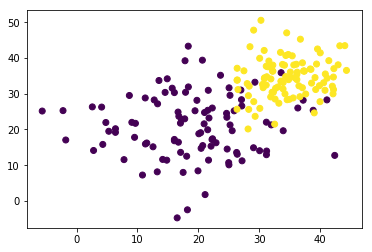

In [28]:
plt.scatter(df['x data'], df['y data'], c=df['class'])
plt.show()

Great! From here we can build our model using the KNeighborsClassifier function - here we're using k=5 for our data.

In [41]:
data = df.drop('class', axis=1).as_matrix()
classes = df['class']


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data,classes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now we can predict any number of points and get the class they correspond with using the <i>predict</i> method on our model:

In [43]:
points = [[0,0], [40,40], [30,30]]

print(knn.predict(points))

[0 1 1]


Sometimes it's helpful to see a breakdown of classification by area. To do this we can create a <i>meshgrid</i> using numpy, and use it to draw a background on our plot. This is a bit tough, but it's very powerful and worth it in the end:

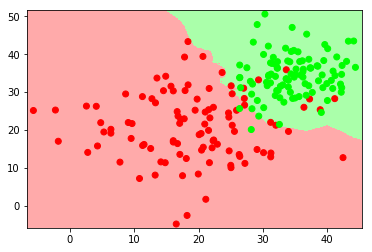

In [62]:
#Setting up the meshgrid require a minimum and maximum bound - it makes sense to use the min and max values of our data for this:

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

#h is the step size of the mesh - lower h means higher resolution.

h=0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
#c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
#We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy

Z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

#We then define our own colormaps (you can skip this step if you want), and plot our data using a colormesh and a scatter plot.

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


Finally we can see what happens when we graph for different values of K, using a for loop.

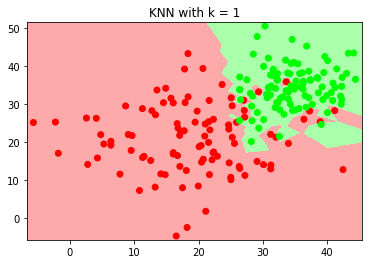

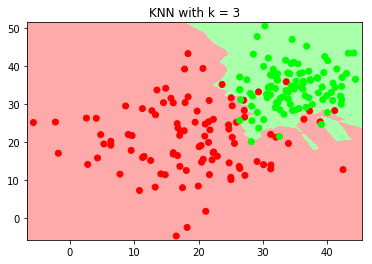

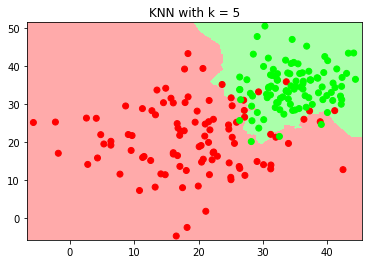

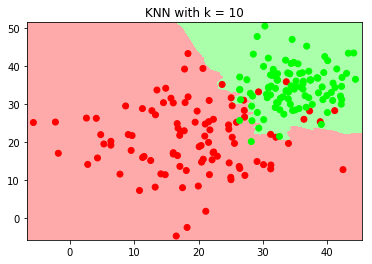

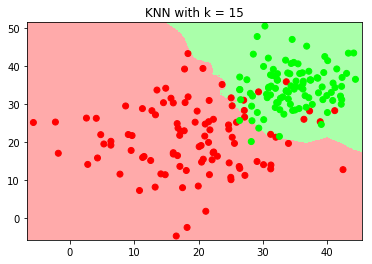

In [64]:
for k in [1,3,5,10,15]:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data,classes)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    
    h=0.1 #h is the step size of the mesh - lower h means higher resolution.
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
    #c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
    #We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy
    
    Z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    #We then define our own colormaps (you can skip this step if you want), and plot our data using a colormesh and a scatter plot.
    
    from matplotlib.colors import ListedColormap
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(data[:, 0], data[:, 1], c=classes, cmap = cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN with k = " + str(k))
    plt.show()

## Mini Project

Below we have some more training and testing data for you to try this out for yourself. Try following the above steps to create a model using the training data, and predict what class the test data is part of. We're switching it up a bit by giving you three dimensional data, with three classes to work with. If you want to see how this data is distributed in a plot, try plotting it using matplotlib's mplot3d sublibrary, but remember you don't need to do that to get the predicitions right!

In [76]:
training_data = pd.read_csv("project_training.csv")
test_data = [[50,50,50], [100,100,100], [150,150,150], [200,200,200],[250,250,250],[300,300,300],[350,350,350],[400,400,400]]

print(training_data.head())
print(training_data.tail())

   class      x data      y data     z data
0      0   80.543502   41.318858  33.818395
1      0   78.291164  127.006373  41.923430
2      0  121.484717  120.776238  74.294293
3      0   22.123624   70.748242 -17.645028
4      0   63.964959  113.604554  98.920726
     class      x data      y data      z data
395      2  362.127598  413.353847  378.205861
396      2  379.437545  386.067748  381.397157
397      2  364.903396  374.196921  374.635584
398      2  378.062759  428.275662  383.364453
399      2  355.313112  332.401421  399.892779
